In [134]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=2000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)



 
print(X.shape)


(2000, 25)


In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)


In [136]:
print(X_train.shape)

(1000, 25)


In [137]:
estimator = tree.DecisionTreeClassifier(max_depth=1) 
train_sizes, train_scores, valid_scores= \
        learning_curve(estimator, X_train, y_train, scoring='accuracy',cv=StratifiedKFold(10),
                       train_sizes=np.linspace(.1, 1.0, 5))

In [138]:
print(train_sizes)


[ 89 291 493 695 898]


In [139]:
print(train_scores)


[[0.30337079 0.29213483 0.30337079 0.30337079 0.30337079 0.30337079
  0.30337079 0.30337079 0.30337079 0.30337079]
 [0.27147766 0.27147766 0.26804124 0.25773196 0.26116838 0.26116838
  0.26116838 0.26116838 0.26116838 0.26116838]
 [0.25760649 0.25760649 0.25760649 0.25557809 0.26166329 0.25557809
  0.25760649 0.25760649 0.25760649 0.25760649]
 [0.24892086 0.24748201 0.24748201 0.25035971 0.24892086 0.24748201
  0.24748201 0.25179856 0.24460432 0.24460432]
 [0.25389755 0.25278396 0.25389755 0.25501114 0.25389755 0.25501114
  0.25501114 0.25389755 0.25723831 0.25612472]]


In [140]:
train_scores_mean = np.mean(train_scores, axis=1)


In [141]:
print(train_scores_mean)

[0.30224719 0.26357388 0.25760649 0.24791367 0.25467706]


In [142]:
print(valid_scores)

[[0.25490196 0.25490196 0.22772277 0.1980198  0.21782178 0.23
  0.23       0.20408163 0.19387755 0.21649485]
 [0.2254902  0.23529412 0.23762376 0.24752475 0.23762376 0.24
  0.24       0.23469388 0.25510204 0.24742268]
 [0.23529412 0.23529412 0.23762376 0.24752475 0.21782178 0.23
  0.25       0.25510204 0.25510204 0.24742268]
 [0.25490196 0.26470588 0.25742574 0.24752475 0.21782178 0.27
  0.26       0.26530612 0.2244898  0.2371134 ]
 [0.25490196 0.26470588 0.25742574 0.24752475 0.25742574 0.26
  0.26       0.23469388 0.2244898  0.2371134 ]]


In [143]:
valid_scores_mean= np.mean(valid_scores, axis=1)


In [144]:
print(valid_scores)

[[0.25490196 0.25490196 0.22772277 0.1980198  0.21782178 0.23
  0.23       0.20408163 0.19387755 0.21649485]
 [0.2254902  0.23529412 0.23762376 0.24752475 0.23762376 0.24
  0.24       0.23469388 0.25510204 0.24742268]
 [0.23529412 0.23529412 0.23762376 0.24752475 0.21782178 0.23
  0.25       0.25510204 0.25510204 0.24742268]
 [0.25490196 0.26470588 0.25742574 0.24752475 0.21782178 0.27
  0.26       0.26530612 0.2244898  0.2371134 ]
 [0.25490196 0.26470588 0.25742574 0.24752475 0.25742574 0.26
  0.26       0.23469388 0.2244898  0.2371134 ]]


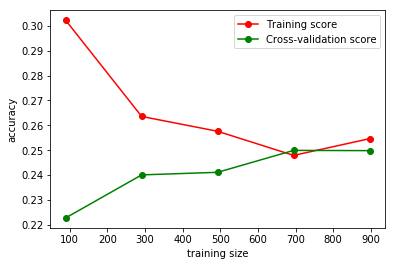

In [145]:
plt.figure()
plt.xlabel("training size")
plt.ylabel("accuracy")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [146]:
estimator.fit(X_train, y_train)
estimator.score(X_test,y_test)

0.222

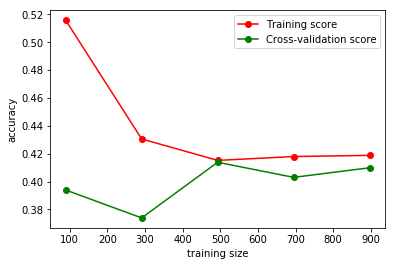

In [147]:
estimator = tree.DecisionTreeClassifier(max_depth=2)
train_sizes, train_scores, valid_scores= \
        learning_curve(estimator, X_train, y_train, scoring='accuracy',cv=StratifiedKFold(10),
                       train_sizes=np.linspace(.1, 1.0, 5))
plt.figure()
plt.xlabel("training size")
plt.ylabel("accuracy")
plt.plot(train_sizes,  np.mean(train_scores, axis=1), 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes,  np.mean(valid_scores, axis=1), 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [148]:
estimator.fit(X_train, y_train)
estimator.score(X_test,y_test)

0.391

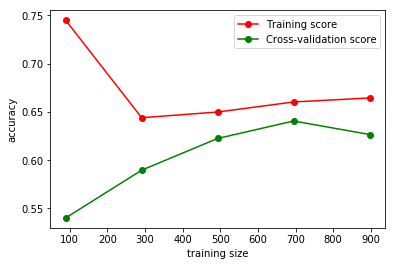

0.617

In [149]:
estimator = tree.DecisionTreeClassifier(max_depth=3)
train_sizes, train_scores, valid_scores= \
        learning_curve(estimator, X_train, y_train, scoring='accuracy',cv=StratifiedKFold(10),
                       train_sizes=np.linspace(.1, 1.0, 5))
plt.figure()
plt.xlabel("training size")
plt.ylabel("accuracy")
plt.plot(train_sizes,  np.mean(train_scores, axis=1), 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes,  np.mean(valid_scores, axis=1), 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()
estimator.fit(X_train, y_train)
estimator.score(X_test,y_test)

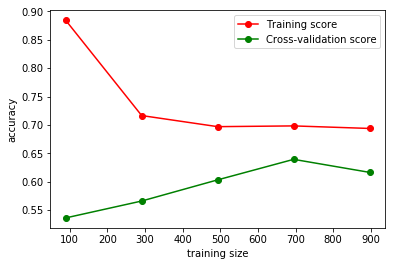

0.625

In [150]:
estimator = tree.DecisionTreeClassifier(max_depth=4)
train_sizes, train_scores, valid_scores= \
        learning_curve(estimator, X_train, y_train, scoring='accuracy',cv=StratifiedKFold(10),
                       train_sizes=np.linspace(.1, 1.0, 5))
plt.figure()
plt.xlabel("training size")
plt.ylabel("accuracy")
plt.plot(train_sizes,  np.mean(train_scores, axis=1), 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes,  np.mean(valid_scores, axis=1), 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()
estimator.fit(X_train, y_train)
estimator.score(X_test,y_test)

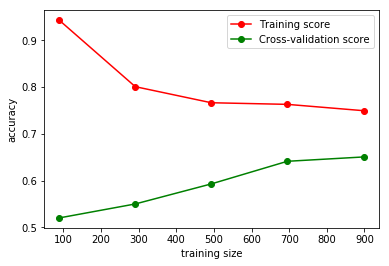

0.643

In [151]:
estimator = tree.DecisionTreeClassifier(max_depth=5)
train_sizes, train_scores, valid_scores= \
        learning_curve(estimator, X_train, y_train, scoring='accuracy',cv=StratifiedKFold(10),
                       train_sizes=np.linspace(.1, 1.0, 5))
plt.figure()
plt.xlabel("training size")
plt.ylabel("accuracy")
plt.plot(train_sizes,  np.mean(train_scores, axis=1), 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes,  np.mean(valid_scores, axis=1), 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()
estimator.fit(X_train, y_train)
estimator.score(X_test,y_test)

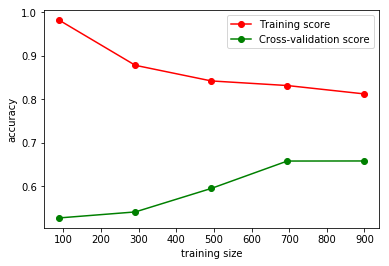

0.644

In [152]:
estimator = tree.DecisionTreeClassifier(max_depth=6)
train_sizes, train_scores, valid_scores= \
        learning_curve(estimator, X_train, y_train, scoring='accuracy',cv=StratifiedKFold(10),
                       train_sizes=np.linspace(.1, 1.0, 5))
plt.figure()
plt.xlabel("training size")
plt.ylabel("accuracy")
plt.plot(train_sizes,  np.mean(train_scores, axis=1), 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes,  np.mean(valid_scores, axis=1), 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()
estimator.fit(X_train, y_train)
estimator.score(X_test,y_test)

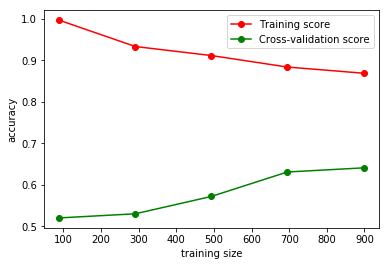

0.653

In [153]:
estimator = tree.DecisionTreeClassifier(max_depth=7)
train_sizes, train_scores, valid_scores= \
        learning_curve(estimator, X_train, y_train, scoring='accuracy',cv=StratifiedKFold(10),
                       train_sizes=np.linspace(.1, 1.0, 5))
plt.figure()
plt.xlabel("training size")
plt.ylabel("accuracy")
plt.plot(train_sizes,  np.mean(train_scores, axis=1), 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes,  np.mean(valid_scores, axis=1), 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()
estimator.fit(X_train, y_train)
estimator.score(X_test,y_test)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1)


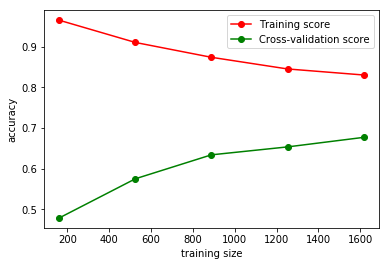

0.65

In [155]:
estimator = tree.DecisionTreeClassifier(max_depth=7)
train_sizes, train_scores, valid_scores= \
        learning_curve(estimator, X_train, y_train, scoring='accuracy',cv=StratifiedKFold(10),
                       train_sizes=np.linspace(.1, 1.0, 5))
plt.figure()
plt.xlabel("training size")
plt.ylabel("accuracy")
plt.plot(train_sizes,  np.mean(train_scores, axis=1), 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes,  np.mean(valid_scores, axis=1), 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()
estimator.fit(X_train, y_train)
estimator.score(X_test,y_test)